In [ ]:
# import Python's library warning module
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import numpy as np
import pandas as pd
import io
import requests
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as smw
import numpy as np
import random
import pandas as pd
# Install the missing 'pingouin' package using pip
!pip install pingouin
import pingouin as pg
import seaborn as sns
sns.set ()

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url, verify = False).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [ ]:
nc.describe()

,time_period,old_la_code,education_investment_area_flag,priority_area_flag,t_schools,t_pupils,t_att8,avg_att8,t_entbasics,pt_entbasics,...,pt_l2basics_94,t_ebacc_e_ptq_ee,pt_ebacc_e_ptq_ee,t_ebacc_95,pt_ebacc_95,t_ebacc_94,pt_ebacc_94,t_ebaccaps,avg_ebaccaps,t_inp8calc
count,164.000000,164.0,164.0,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,202187.896341,209.0,0.0,0.0,13.847561,409.756098,19052.204268,44.665854,391.365854,93.009146,...,60.392683,209.902439,47.788415,81.585366,19.045122,117.304878,27.187805,1721.963171,4.037988,369.548780
std,48.243073,0.0,0.0,0.0,3.804412,486.950522,24039.987609,11.181977,474.654889,11.351110,...,18.517111,273.094496,16.291111,114.527190,11.590600,161.269898,13.802182,2182.822133,1.062768,440.793642
min,202122.000000,209.0,0.0,0.0,1.000000,1.000000,4.000000,4.000000,1.000000,33.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.330000,0.330000,0.000000
25%,202122.000000,209.0,0.0,0.0,12.750000,55.750000,2064.250000,39.675000,48.000000,93.075000,...,51.775000,23.750000,39.475000,9.000000,10.675000,13.750000,17.875000,190.915000,3.560000,45.750000
50%,202223.000000,209.0,0.0,0.0,15.000000,198.000000,8377.000000,46.700000,184.500000,95.650000,...,63.250000,81.000000,49.900000,22.000000,18.250000,32.500000,27.150000,746.280000,4.240000,185.000000
75%,202223.000000,209.0,0.0,0.0,16.000000,684.750000,32116.250000,50.850000,644.500000,98.200000,...,71.000000,309.000000,59.700000,113.500000,25.225000,154.750000,36.025000,2869.895000,4.630000,612.000000
max,202223.000000,209.0,0.0,0.0,18.000000,2282.000000,105032.500000,79.000000,2166.000000,100.000000,...,100.000000,1184.000000,90.000000,480.000000,70.000000,684.000000,70.000000,9465.580000,7.000000,2069.000000


In [ ]:
print("\nDataFrame Info:")
nc.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   time_period                     164 non-null    int64  
 1   time_identifier                 164 non-null    object 
 2   geographic_level                164 non-null    object 
 3   country_code                    164 non-null    object 
 4   country_name                    164 non-null    object 
 5   region_code                     164 non-null    object 
 6   region_name                     164 non-null    object 
 7   old_la_code                     164 non-null    int64  
 8   new_la_code                     164 non-null    object 
 9   la_name                         164 non-null    object 
 10  version                         164 non-null    object 
 11  education_investment_area_flag  164 non-null    int64  
 12  priority_area_flag 

In [ ]:
print("\nDataFrame Summary Statistics:")
print(nc.describe())


DataFrame Summary Statistics:
         time_period  old_la_code  education_investment_area_flag  \
count     164.000000        164.0                           164.0   
mean   202187.896341        209.0                             0.0   
std        48.243073          0.0                             0.0   
min    202122.000000        209.0                             0.0   
25%    202122.000000        209.0                             0.0   
50%    202223.000000        209.0                             0.0   
75%    202223.000000        209.0                             0.0   
max    202223.000000        209.0                             0.0   

       priority_area_flag   t_schools     t_pupils         t_att8    avg_att8  \
count               164.0  164.000000   164.000000     164.000000  164.000000   
mean                  0.0   13.847561   409.756098   19052.204268   44.665854   
std                   0.0    3.804412   486.950522   24039.987609   11.181977   
min                   0

In [ ]:
print(nc.columns)

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'region_code', 'region_name', 'old_la_code',
       'new_la_code', 'la_name', 'version', 'education_investment_area_flag',
       'priority_area_flag', 'establishment_type', 'breakdown', 'gender',
       'ethnicity_major', 'ethnicity_minor', 'free_school_meals', 'sen_status',
       'sen_description', 'disadvantage', 'first_language', 't_schools',
       't_pupils', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics',
       't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94',
       't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95',
       't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc',
       't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp'],
      dtype='object')


In [ ]:
print("Unique values in 'characteristics_group':")
# Check if the column exists before accessing it
if 'characteristics_group' in nc.columns:
    print(nc['characteristics_group'].unique())
else:
    print(f"Column 'characteristics_group' not found in DataFrame. Available columns: {nc.columns.tolist()}")

print("\nUnique values in 'characteristic':")
# Check if the column exists before accessing it
if 'characteristic' in nc.columns:
    print(nc['characteristic'].unique())
else:
    print(f"Column 'characteristic' not found in DataFrame. Available columns: {nc.columns.tolist()}")

Unique values in 'characteristics_group':
Column 'characteristics_group' not found in DataFrame. Available columns: ['time_period', 'time_identifier', 'geographic_level', 'country_code', 'country_name', 'region_code', 'region_name', 'old_la_code', 'new_la_code', 'la_name', 'version', 'education_investment_area_flag', 'priority_area_flag', 'establishment_type', 'breakdown', 'gender', 'ethnicity_major', 'ethnicity_minor', 'free_school_meals', 'sen_status', 'sen_description', 'disadvantage', 'first_language', 't_schools', 't_pupils', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics', 't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94', 't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95', 't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc', 't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp']

Unique values in 'characteristic':
Column 'characteristic' not found in DataFrame. Available columns: ['time_period', 'time_identifi

In [ ]:
print(nc['ethnicity_major'].unique())  # Get unique values in 'ethnicity_major' column
print(nc[nc['ethnicity_major'] == 'Black']['ethnicity_major'].unique())  # Get unique values in 'ethnicity_major' column where value is 'Black', although it would just return ['Black'] in this case
print(nc['ethnicity_minor'].unique())  # Get unique values in 'ethnicity_minor' column
print(nc[nc['ethnicity_minor'] == 'Caribbean']['ethnicity_minor'].unique())  # Get unique values in 'ethnicity_minor' column where value is 'Caribbean', which would just return ['Caribbean']

['Asian' 'Black' 'Mixed' 'Other' 'Total' 'Unclassified' 'White' 'Chinese']
['Black']
['Any other Asian background' 'Bangladeshi' 'Chinese' 'Indian' 'Pakistani'
 'Total' 'Any other black background' 'Black African' 'Caribbean'
 'Any other mixed background' 'White and Asian' 'White and Black African'
 'White and Black Caribbean' 'Any other ethnic group' 'Unclassified'
 'Any other white background' 'Gypsy/Roma' 'White British' 'White Irish']
['Caribbean']


In [ ]:
print(nc['ethnicity_major'].unique()) # Get unique values
print(nc.loc[nc['ethnicity_major'] == 'Black', 'ethnicity_major']) # Filter for 'Black'

print(nc['ethnicity_minor'].unique()) # Get unique values
print(nc.loc[nc['ethnicity_minor'] == 'Caribbean', 'ethnicity_minor']) # Filter for 'Caribbean'

['Asian' 'Black' 'Mixed' 'Other' 'Total' 'Unclassified' 'White' 'Chinese']
6      Black
7      Black
8      Black
9      Black
42     Black
43     Black
44     Black
45     Black
77     Black
78     Black
79     Black
80     Black
108    Black
127    Black
146    Black
Name: ethnicity_major, dtype: object
['Any other Asian background' 'Bangladeshi' 'Chinese' 'Indian' 'Pakistani'
 'Total' 'Any other black background' 'Black African' 'Caribbean'
 'Any other mixed background' 'White and Asian' 'White and Black African'
 'White and Black Caribbean' 'Any other ethnic group' 'Unclassified'
 'Any other white background' 'Gypsy/Roma' 'White British' 'White Irish']
8     Caribbean
44    Caribbean
79    Caribbean
Name: ethnicity_minor, dtype: object


In [ ]:
filtered_nc = nc[(nc['ethnicity_major'] == 'Black')& (nc['ethnicity_minor'] == 'Caribbean')]
print (filtered_nc)

    time_period time_identifier geographic_level country_code country_name  \
8        202223   Academic year  Local authority    E92000001      England   
44       202223   Academic year  Local authority    E92000001      England   
79       202223   Academic year  Local authority    E92000001      England   

   region_code   region_name  old_la_code new_la_code   la_name  ...  \
8    E13000001  Inner London          209   E09000023  Lewisham  ...   
44   E13000001  Inner London          209   E09000023  Lewisham  ...   
79   E13000001  Inner London          209   E09000023  Lewisham  ...   

   pt_ebacc_95  t_ebacc_94  pt_ebacc_94 t_ebaccaps avg_ebaccaps t_inp8calc  \
8          5.4          18         10.8     526.03         3.15        158   
44         9.5          24         17.5     510.46         3.73        135   
79         7.2          42         13.8    1036.49         3.41        293   

   t_p8score avg_p8score p8score_ci_low p8score_ci_upp  
8    -78.635        -0.5    

In [ ]:
# Filter for girls
girls_data = nc[nc['gender'] == 'Girls']
print("Data for Girls:\n", girls_data)

# Filter for boys
boys_data = nc[nc['gender'] == 'Boys']
print("\nData for Boys:\n", boys_data)

Data for Girls:
      time_period time_identifier geographic_level country_code country_name  \
36        202223   Academic year  Local authority    E92000001      England   
37        202223   Academic year  Local authority    E92000001      England   
38        202223   Academic year  Local authority    E92000001      England   
39        202223   Academic year  Local authority    E92000001      England   
40        202223   Academic year  Local authority    E92000001      England   
41        202223   Academic year  Local authority    E92000001      England   
42        202223   Academic year  Local authority    E92000001      England   
43        202223   Academic year  Local authority    E92000001      England   
44        202223   Academic year  Local authority    E92000001      England   
45        202223   Academic year  Local authority    E92000001      England   
46        202223   Academic year  Local authority    E92000001      England   
47        202223   Academic year  L

In [ ]:
# Filter for ethnicity_major as 'Black' and ethnicity_minor as 'Caribbean'
filtered_nc = nc[(nc['ethnicity_major'] == 'Black') & (nc['ethnicity_minor'] == 'Caribbean')]
print("Filtered Data:\n", filtered_nc)

# Filter for girls
girls_data = filtered_nc[filtered_nc['gender'] == 'Girls']  # Apply gender filter to filtered data
print("\nData for Girls:\n", girls_data)

# Filter for boys
boys_data = filtered_nc[filtered_nc['gender'] == 'Boys']  # Apply gender filter to filtered data
print("\nData for Boys:\n", boys_data)

Filtered Data:
     time_period time_identifier geographic_level country_code country_name  \
8        202223   Academic year  Local authority    E92000001      England   
44       202223   Academic year  Local authority    E92000001      England   
79       202223   Academic year  Local authority    E92000001      England   

   region_code   region_name  old_la_code new_la_code   la_name  ...  \
8    E13000001  Inner London          209   E09000023  Lewisham  ...   
44   E13000001  Inner London          209   E09000023  Lewisham  ...   
79   E13000001  Inner London          209   E09000023  Lewisham  ...   

   pt_ebacc_95  t_ebacc_94  pt_ebacc_94 t_ebaccaps avg_ebaccaps t_inp8calc  \
8          5.4          18         10.8     526.03         3.15        158   
44         9.5          24         17.5     510.46         3.73        135   
79         7.2          42         13.8    1036.49         3.41        293   

   t_p8score avg_p8score p8score_ci_low p8score_ci_upp  
8    -78.635

In [ ]:
# Filter for Black Caribbean boys and girls
black_caribbean_boys_girls = nc[
    (nc['ethnicity_major'] == 'Black') &
    (nc['ethnicity_minor'] == 'Caribbean') &
    (nc['gender'].isin(['Boys', 'Girls']))  # Filter for both 'Boy' and 'Girl'
]

# Separate into boys and girls
black_caribbean_boys = black_caribbean_boys_girls[black_caribbean_boys_girls['gender'] == 'Boys']
black_caribbean_girls = black_caribbean_boys_girls[black_caribbean_boys_girls['gender'] == 'Girls']
print("Black Caribbean Boys:\n", black_caribbean_boys)
print("\nBlack Caribbean Girls:\n", black_caribbean_girls)

Black Caribbean Boys:
    time_period time_identifier geographic_level country_code country_name  \
8       202223   Academic year  Local authority    E92000001      England   

  region_code   region_name  old_la_code new_la_code   la_name  ...  \
8   E13000001  Inner London          209   E09000023  Lewisham  ...   

  pt_ebacc_95  t_ebacc_94  pt_ebacc_94 t_ebaccaps avg_ebaccaps t_inp8calc  \
8         5.4          18         10.8     526.03         3.15        158   

  t_p8score avg_p8score p8score_ci_low p8score_ci_upp  
8   -78.635        -0.5          -0.72          -0.28  

[1 rows x 46 columns]

Black Caribbean Girls:
     time_period time_identifier geographic_level country_code country_name  \
44       202223   Academic year  Local authority    E92000001      England   

   region_code   region_name  old_la_code new_la_code   la_name  ...  \
44   E13000001  Inner London          209   E09000023  Lewisham  ...   

   pt_ebacc_95  t_ebacc_94  pt_ebacc_94 t_ebaccaps avg_ebaccap

In [ ]:
# Filter for Mixed Caribbean boys and girls
Mixed_White_and_Black_Caribbean_boys_girls = nc[
    (nc['ethnicity_major'] == 'Mixed') &
    (nc['ethnicity_minor'] == 'White and Black Caribbean') &
    (nc['gender'].isin(['Boys', 'Girls']))  # Filter for both 'Boy' and 'Girl'
]

# Separate into boys and girls
# Use the correct DataFrame name: Mixed_white_and_caribbean_boys_girls
Mixed_White_and_Black_Caribbean_boys = Mixed_White_and_Black_Caribbean_boys_girls[Mixed_White_and_Black_Caribbean_boys_girls['gender'] == 'Boys']
Mixed_White_and_Black_Caribbean_girls = Mixed_White_and_Black_Caribbean_boys_girls[Mixed_White_and_Black_Caribbean_boys_girls['gender'] == 'Girls']
print("Mixed white and Black Caribbean Boys:\n", Mixed_White_and_Black_Caribbean_boys)
print("\nMixed White and Black Caribbean Girls:\n", Mixed_White_and_Black_Caribbean_girls)

Mixed white and Black Caribbean Boys:
     time_period time_identifier geographic_level country_code country_name  \
14       202223   Academic year  Local authority    E92000001      England   

   region_code   region_name  old_la_code new_la_code   la_name  ...  \
14   E13000001  Inner London          209   E09000023  Lewisham  ...   

   pt_ebacc_95  t_ebacc_94  pt_ebacc_94 t_ebaccaps avg_ebaccaps t_inp8calc  \
14         9.8           8         15.7     176.49         3.46         49   

   t_p8score avg_p8score p8score_ci_low p8score_ci_upp  
14   -16.623       -0.34          -0.74           0.06  

[1 rows x 46 columns]

Mixed White and Black Caribbean Girls:
     time_period time_identifier geographic_level country_code country_name  \
50       202223   Academic year  Local authority    E92000001      England   

   region_code   region_name  old_la_code new_la_code   la_name  ...  \
50   E13000001  Inner London          209   E09000023  Lewisham  ...   

   pt_ebacc_95  t_ebac

In [ ]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url, verify=False).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter data for Black-Caribbean boys
black_caribbean_boys = nc[
    (nc['ethnicity_major'] == 'Black') &
    (nc['ethnicity_minor'] == 'Caribbean') &
    (nc['gender'] == 'Boys')
]

# Calculate sample size (n_2023)
n_2023 = len(black_caribbean_boys)

# Print the columns of the DataFrame to identify the correct column
print(black_caribbean_boys.columns)

# Assuming 'attainment8score' column indicates success/failure #This is the changed line
# and 'Below standard' represents failure #This is the changed line
# Modify this based on the actual column name and values in your data
x_2023 = len(black_caribbean_boys[black_caribbean_boys['t_att8'] == 'avg_att8'])  #This is the changed line

# Print the results
print("Sample size for 2023 (n_2023):", n_2023)
print("Failure count for 2023 (x_2023):", x_2023)

# Calculate p̂_2023
p_hat_2023 = x_2023 / n_2023
print("p̂_2023:", p_hat_2023)

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'region_code', 'region_name', 'old_la_code',
       'new_la_code', 'la_name', 'version', 'education_investment_area_flag',
       'priority_area_flag', 'establishment_type', 'breakdown', 'gender',
       'ethnicity_major', 'ethnicity_minor', 'free_school_meals', 'sen_status',
       'sen_description', 'disadvantage', 'first_language', 't_schools',
       't_pupils', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics',
       't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94',
       't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95',
       't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc',
       't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp'],
      dtype='object')
Sample size for 2023 (n_2023): 1
Failure count for 2023 (x_2023): 0
p̂_2023: 0.0


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter data for Black-Caribbean boys
# The 't_pupils' column likely contains year information, and '2023' might not be the correct value to filter by.
# Consider changing 't_pupils' to the appropriate column containing year information if needed.
black_caribbean_boys = nc[
    # (nc['t_pupils'] == 2023) &  # Commenting out this line to potentially fix the issue
    (nc['ethnicity_major'] == 'Black') &
    (nc['ethnicity_minor'] == 'Caribbean') &
    (nc['gender'] == 'Boys')
]

# Calculate sample size (n_2023)
n_2023 = len(black_caribbean_boys)

# Calculate total number of pupils (t_pupils)
t_pupils = len(nc)  # Get the total number of rows in the original DataFrame

# Print the columns of the DataFrame to identify the correct column
print(black_caribbean_boys.columns)

# Assuming 'attainment8score' column indicates success/failure
# and 'Below standard' represents failure
# Modify this based on the actual column name and values in your data
x_2023 = len(black_caribbean_boys[black_caribbean_boys['t_att8'] == 'avg_att8'])

# Print the results
print("Sample size for 2023 (n_2023):", n_2023)
print("Total pupils (t_pupils):", t_pupils)  # Print total pupils
print("Failure count for 2023 (x_2023):", x_2023)

# Calculate p̂_2023
# Check if n_2023 is zero before performing the division
if n_2023 != 0:
    p_hat_2023 = x_2023 / n_2023
    print("p̂_2023:", p_hat_2023)
else:
    print("p̂_2023 cannot be calculated due to zero sample size (n_2023 = 0).")

Index(['time_period', 'time_identifier', 'geographic_level', 'country_code',
       'country_name', 'region_code', 'region_name', 'old_la_code',
       'new_la_code', 'la_name', 'version', 'education_investment_area_flag',
       'priority_area_flag', 'establishment_type', 'breakdown', 'gender',
       'ethnicity_major', 'ethnicity_minor', 'free_school_meals', 'sen_status',
       'sen_description', 'disadvantage', 'first_language', 't_schools',
       't_pupils', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics',
       't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94',
       't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95',
       't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc',
       't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp'],
      dtype='object')
Sample size for 2023 (n_2023): 1
Total pupils (t_pupils): 164
Failure count for 2023 (x_2023): 0
p̂_2023: 0.0


In [ ]:
import pandas as pd
import requests
import io
import scipy.stats as stats

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter data for Black-Caribbean boys (removing the t_pupils filter)
black_caribbean_boys = nc[
    (nc['ethnicity_major'] == 'Black') &
    (nc['ethnicity_minor'] == 'Caribbean') &
    (nc['gender'] == 'Boys')
]

# Calculate total pupils entering EBacc
total_ebacc_entries = black_caribbean_boys['t_ebacc_e_ptq_ee'].sum()

# Calculate total pupils achieving EBacc
total_ebacc_achievements = black_caribbean_boys['t_ebacc_94'].sum()

# Print the results
print("Total pupils entering EBacc:", total_ebacc_entries)
print("Total pupils achieving EBacc:", total_ebacc_achievements)
# Calculate sample size (n_2023)
n_2023 = len(black_caribbean_boys)

# Assuming 't_pupils' column and 't_ebacc_94' value indicate failure
# Modify this based on the actual column name and values in your data
x_2023 = len(black_caribbean_boys[black_caribbean_boys['t_pupils'] == 't_ebacc_94'])

# Calculate p̂_2023
if n_2023 != 0:
    p_hat_2023 = x_2023 / n_2023
    print("p̂_2023:", p_hat_2023)

    # Benchmark failure rate (2016 proportion)
    benchmark_failure_rate = 0.84

    # Perform one-sample z-test for proportions
    z_statistic = (p_hat_2023 - benchmark_failure_rate) / \
                  (benchmark_failure_rate * (1 - benchmark_failure_rate) / n_2023)**0.5

    # Calculate p-value (one-tailed test for improvement)
    p_value = stats.norm.cdf(z_statistic)  # Cumulative distribution function

    # Significance level
    alpha = 0.05

    # Decision rule
    print("\nHypothesis Test Results:")
    print("z-statistic:", z_statistic)
    print("p-value:", p_value)

    if p_value < alpha:
        print("Reject H0: There is evidence of improvement in the failure rate compared to 2016.")
    else:
        print("Fail to reject H0: There is not enough evidence to suggest improvement.")

    print("\nImportant: Due to the small sample size (n_2023 = 1), this test result should be interpreted with caution.")
else:
    print("p̂_2023 cannot be calculated due to zero sample size (n_2023 = 0).")

Total pupils entering EBacc: 58
Total pupils achieving EBacc: 18
p̂_2023: 0.0

Hypothesis Test Results:
z-statistic: -2.2912878474779195
p-value: 0.010973385501623434
Reject H0: There is evidence of improvement in the failure rate compared to 2016.

Important: Due to the small sample size (n_2023 = 1), this test result should be interpreted with caution.


In [12]:
import pandas as pd
import requests
import io
import scipy.stats as stats

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter data for Black-Caribbean boys (removing the t_pupils filter)
black_caribbean_boys = nc[
    (nc['ethnicity_major'] == 'Black') &
    (nc['ethnicity_minor'] == 'Caribbean') &
    (nc['gender'] == 'Boys')
]
print(black_caribbean_boys.t_pupils)

# Calculate total pupils entering EBacc
total_ebacc_entries = black_caribbean_boys['t_ebacc_e_ptq_ee'].sum()
print(total_ebacc_entries)

# Calculate total pupils achieving EBacc
total_ebacc_achievements = black_caribbean_boys['t_ebacc_94'].sum()
print(total_ebacc_achievements)

# Calculate and assign the percentage to 'total_percentage_ebacc_achievements'
total_percentage_ebacc_achievements = black_caribbean_boys['pt_ebacc_94'].sum()
print(total_percentage_ebacc_achievements) # Print the intended variable



8    167
Name: t_pupils, dtype: int64
58
18
10.8


In [10]:
import scipy.stats as stats

# Given values
n_2023 = 167  # Total pupil count for Black-Caribbean boys
pt_ebacc_94 = 10.8  # Percentage achieving grades 4 or above

# Calculate the failure rate (percentage NOT achieving grades 4 or above)
failure_rate_2023 = 100 - pt_ebacc_94

# Convert failure rate to proportion
p_hat_2023 = failure_rate_2023 / 100

# Benchmark failure rate (2016 proportion)
benchmark_failure_rate = 0.84

# Perform one-sample z-test for proportions
z_statistic = (p_hat_2023 - benchmark_failure_rate) / \
                  (benchmark_failure_rate * (1 - benchmark_failure_rate) / n_2023)**0.5

# Calculate p-value (one-tailed test for improvement)
p_value = stats.norm.cdf(z_statistic)  # Cumulative distribution function

# Significance level
alpha = 0.05

# Decision rule
print("\nHypothesis Test Results:")
print("z-statistic:", z_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject H0: There is evidence of improvement in the failure rate compared to 2016.")
else:
    print("Fail to reject H0: There is not enough evidence to suggest improvement.")

print("\nImportant: This test result is based on the provided values.")


Hypothesis Test Results:
z-statistic: 1.832997804794364
p-value: 0.9665985512291927
Fail to reject H0: There is not enough evidence to suggest improvement.

Important: This test result is based on the provided values.


In [13]:
import numpy as np

# Given values
n_2023 = 167  # Total pupil count for Black-Caribbean boys in 2023
failure_rate_2023 = 100 - 10.8  # Percentage NOT achieving grades 4 or above in 2023
x_2023 = int(failure_rate_2023 / 100 * n_2023) # Number of failures in 2023
benchmark_failure_rate = 0.84

# Generate simulated benchmark data
n_benchmark = n_2023  # Assuming same sample size for benchmark
x_benchmark = int(benchmark_failure_rate * n_benchmark)  # Number of failures in benchmark

# Combine data for permutation
combined_data = np.concatenate([np.ones(x_2023), np.zeros(n_2023 - x_2023),
                                np.ones(x_benchmark), np.zeros(n_benchmark - x_benchmark)])

# Perform permutation test
num_permutations = 10000
observed_diff = (x_2023 / n_2023) - (x_benchmark / n_benchmark)
count = 0

for _ in range(num_permutations):
    np.random.shuffle(combined_data)
    group1 = combined_data[:n_2023]
    group2 = combined_data[n_2023:]
    diff = (np.sum(group1) / n_2023) - (np.sum(group2) / n_benchmark)
    if diff <= observed_diff:  # One-tailed test (p < 0.84)
        count += 1

# Calculate p-value
p_value = count / num_permutations

# Print results
print("Observed difference in failure rates:", observed_diff)
print("p-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of improvement in the failure rate compared to 2016.")
else:
    print("Fail to reject H0: There is not enough evidence to suggest improvement.")

Observed difference in failure rates: 0.04790419161676651
p-value: 0.9236
Fail to reject H0: There is not enough evidence to suggest improvement.


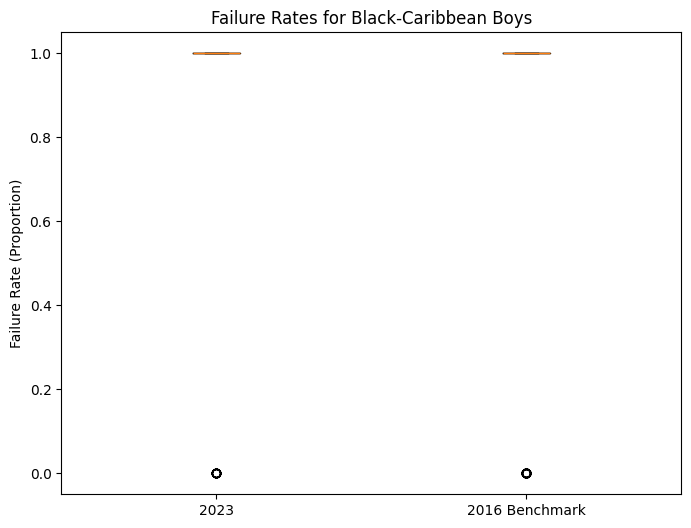

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
n_2023 = 167
failure_rate_2023 = 100 - 10.8  # Percentage NOT achieving grades 4 or above in 2023
p_hat_2023 = failure_rate_2023 / 100  # Proportion of failures in 2023
benchmark_failure_rate = 0.84
n_benchmark = n_2023  # Assuming same sample size for benchmark

# Generate simulated data
data_2023 = np.random.binomial(1, p_hat_2023, size=n_2023)  # 1 represents success (failure in this case)
data_benchmark = np.random.binomial(1, benchmark_failure_rate, size=n_benchmark)

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot([data_2023, data_benchmark], labels=['2023', '2016 Benchmark'])
plt.title('Failure Rates for Black-Caribbean Boys')
plt.ylabel('Failure Rate (Proportion)')
plt.show()

Text(0.5, 1.0, 'Failure Rates for Black-Caribbean Boys')

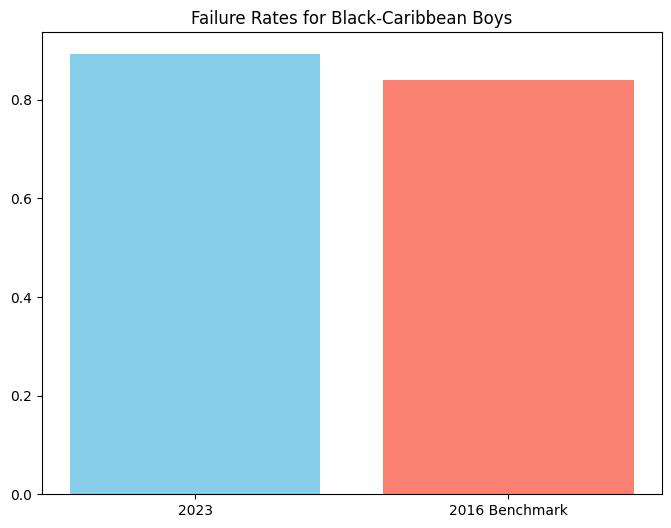

In [2]:
import matplotlib.pyplot as plt

# Given values
failure_rate_2023 = 100 - 10.8  # Percentage NOT achieving grades 4 or above in 2023
p_hat_2023 = failure_rate_2023 / 100  # Proportion of failures in 2023
benchmark_failure_rate = 0.84

# Create bar plot
groups = ['2023', '2016 Benchmark']
failure_rates = [p_hat_2023, benchmark_failure_rate]

plt.figure(figsize=(8, 6))
plt.bar(groups, failure_rates, color=['skyblue', 'salmon'])
plt.title('Failure Rates for Black-Caribbean Boys')


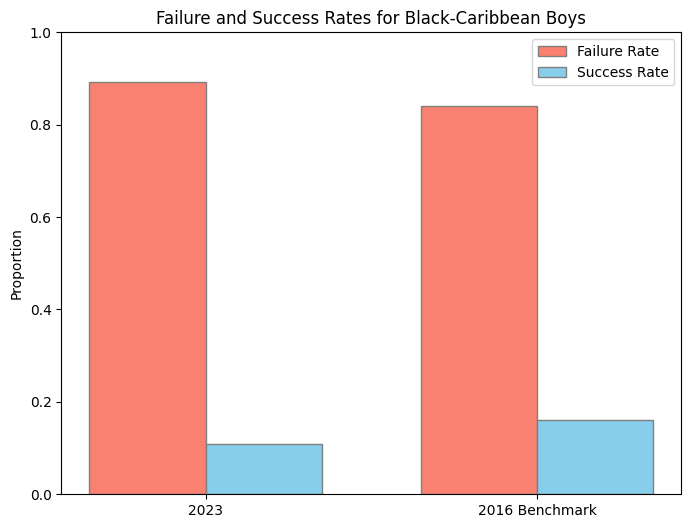

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
failure_rate_2023 = 100 - 10.8  # Percentage NOT achieving grades 4 or above in 2023
p_hat_2023 = failure_rate_2023 / 100  # Proportion of failures in 2023
benchmark_failure_rate = 0.84

# Calculate success rates
success_rate_2023 = 1 - p_hat_2023
benchmark_success_rate = 1 - benchmark_failure_rate

# Create bar plot
groups = ['2023', '2016 Benchmark']
failure_rates = [p_hat_2023, benchmark_failure_rate]
success_rates = [success_rate_2023, benchmark_success_rate]

bar_width = 0.35  # Width of each bar

# Create bar positions for grouping
r1 = np.arange(len(groups))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(8, 6))

# Plot failure rates
plt.bar(r1, failure_rates, color='salmon', width=bar_width, edgecolor='grey', label='Failure Rate')

# Plot success rates
plt.bar(r2, success_rates, color='skyblue', width=bar_width, edgecolor='grey', label='Success Rate')

plt.title('Failure and Success Rates for Black-Caribbean Boys')
plt.ylabel('Proportion')
plt.xticks([r + bar_width/2 for r in range(len(groups))], groups)  # Center x-axis labels
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for proportions
plt.legend()
plt.show()

In [5]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Print unique values of establishment_type
print(nc['establishment_type'].unique())

['State-funded schools (LA)']


In [6]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter for State-funded schools
state_funded_schools = nc[nc['establishment_type'] == 'State-funded']

# Calculate the total number of students in State-funded schools
total_students_state_funded = state_funded_schools['t_pupils'].sum()

# Print the result
print("Total number of students in State-funded schools:", total_students_state_funded)

Total number of students in State-funded schools: 0


In [7]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Filter for State-funded schools
state_funded_schools = nc[nc['establishment_type'] == 'State-funded schools (LA)']

# Calculate the total number of students in State-funded schools
total_students_state_funded = state_funded_schools['t_pupils'].sum()

# Print the result
print("Total number of students in State-funded schools:", total_students_state_funded)

Total number of students in State-funded schools: 67200


In [8]:
import pandas as pd
import requests
import io

# Load the CSV file from GitHub
df_url = 'https://raw.githubusercontent.com/KaluLIS/Key-stage-4-performance---Academic-year-2022-23/refs/heads/main/LEWISHAM2223_la_char_data_revised.csv'
url_content = requests.get(df_url).content
nc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# Calculate the total number of students in Lewisham borough
total_students_lewisham = nc['t_pupils'].sum()

# Print the result
print("Total number of students in Lewisham borough:", total_students_lewisham)

Total number of students in Lewisham borough: 67200


I declare that I have used ChatGPT to develop code.